### Table of contents

### This script contains the following:
1. Importing libraries and data
2. Data cleaning and preparation
Scatterplot  
Hypothesis  
Reshaping  
Splitting
3. Regression analysis
4. Conclusions

### 1. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium 
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
from folium.features import GeoJsonPopup, GeoJsonTooltip
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Define path
path = r'C:\Users\sandu\Desktop\WorldHappinessReport\Data\Prepared Data'
path1 =r'C:\Users\sandu\Desktop\WorldHappinessReport\Visualizations'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path,'2015-2023.csv'), index_col = False)
df.head()

,Unnamed: 0,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category
0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy
1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy
2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy
3,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy
4,4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy


In [5]:
df.shape

(1362, 14)

### 2. Data cleaning and preparation

In [6]:
# Check columns
df.columns

Index(['Unnamed: 0', 'country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions',
       'year', 'happiness_rank', 'avg_happiness_score', 'happiness_category'],
      dtype='object')

In [8]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                      0
country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
corruption_perceptions          0
year                            0
happiness_rank                  0
avg_happiness_score             0
happiness_category              0
dtype: int64

In [9]:
# Check for duplicates
dups = df.duplicated()
dups.shape # No Dups

(1362,)

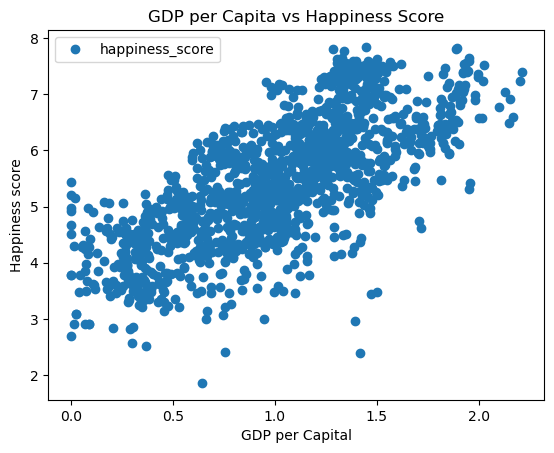

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'gdp_per_capita', y = 'happiness_score',style = 'o') 
plt.title('GDP per Capital vs Happiness Score')  
plt.xlabel('GDP per Capital')  
plt.ylabel('Happiness score')  
plt.show()

#### Hypothesis
##### GDP per capital
Countries with higher GDP per capita are likely to have higher happiness scores, suggesting that economic well-being is a significant predictor of happiness.

#### Reshaping

In [11]:
# GDP_per_Capital - Reshape the variables into NumPy arrays and put them into separate objects
X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

##### Splitting data into a training set and a test set

In [12]:
# Split data into a training set and a test set 

# GDP_per_Capital
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression analysis

In [13]:
# Create a regression object
regression = LinearRegression()

In [14]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

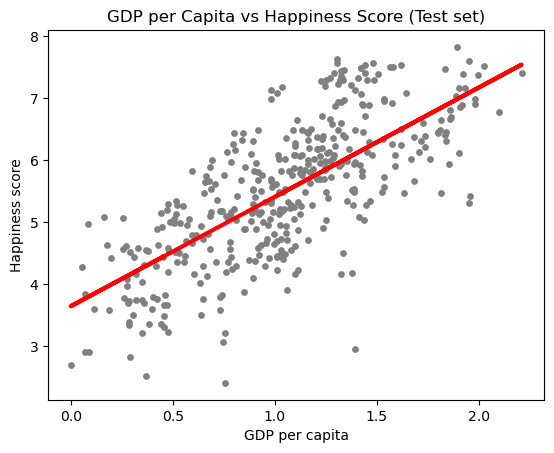

<Figure size 640x480 with 0 Axes>

In [17]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capital vs Happiness Score (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness score')
plot_test.show()
plot_test.savefig(os.path.join(path1, 'PlotTest_GDPvsHappiness'),bbox_inches='tight', pad_inches=0.1)

You can immediately see that the linear model represented by the red regression line does not perfectly cover all data points, but there is a strong positive correlation, Happiness_Score data points go up as GDP_per_capita increases.

In [18]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [19]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76365357]]
Mean squared error:  0.5906337445093252
R2 score:  0.5354775640852132


In [20]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.0720,5.421351
1,5.4888,5.442363
2,7.2228,5.951146
3,6.4770,5.260170
4,3.8450,3.762458
5,5.1990,4.476032
6,6.9650,6.003356
7,4.6230,5.283786
8,3.7630,4.384569
9,6.0120,6.576544


##### Compare how the regression fits the training set

In [21]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [22]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76365357]]
Mean squared error:  0.5948144802959832
R2 score:  0.5191981921995164


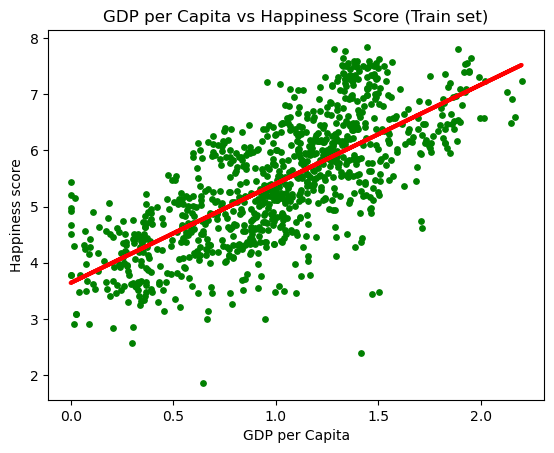

<Figure size 640x480 with 0 Axes>

In [25]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s = 15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('GDP per Capital vs Happiness Score (Train set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness score')
plot_test.show()
plot_test.savefig(os.path.join(path1, 'PlotTest_GDPvsHappinessTrainSet'),bbox_inches='tight', pad_inches=0.1)

### 4. Conclusions

**Slope**
The slope indicates that there is a positive relationship between the independent and the dependent variable. For each unit increase in the independent variable, we can expect an increase of approximately 2.152 units in the dependent variable. This suggests that the model has captured a meaningful relationship between the variables.

**Mean Squared Error**
As the Mean Squared Error tells us how close a regression line is to a set of points, lower value is generally better. In this case, the MSE is relatively low, which indicates that the model's predictions are fairly close to the actual values. However, whether this level of error is acceptable or not depends on what accuracy is expected.

**R2 Score**
The R2 score of approximately 0.6445 suggests that the model explains about 64.45% of the variance in the dependent variable. While an R2 score of 1 would indicate a perfect fit and 0 indicate a poor fit, an R2 score of 0.6445 we can assume as a moderate fit.

The model appears to have captured meaningful relationship between the variables, and it provides pretty good predictions with a relatively low MSE and a moderate R2 score. In some cases this performance can be satisfactory but it depends on the specific requirements and objectives of analysis or project.